# <font color='red'>Backpropagation</font>

## <font color='red'>Loading data </font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import math

with open('/content/drive/MyDrive/Colab Notebooks/Backpropagation/data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

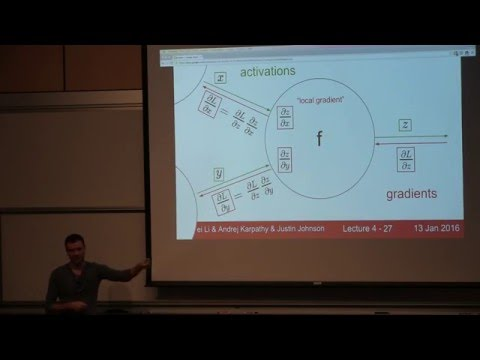

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")

# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

## <font color='red'>Task 1: Implementing Forward propagation, Backpropagation and Gradient checking </font>

# <font color='red'>Task 1.1 </font>

## <font color='blue'>Forward propagation </font>


*  <b>
    Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

In [3]:
def sigmoid(z):
    '''In this function, we will compute the sigmoid(z)'''
    # we can use this function in forward and backward propagation 
    return 1/(1+np.exp(-z))

In [4]:
def grader_sigmoid(z):
  #if you have written the code correctly then the grader function will output true
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [5]:
def forward_propagation(x, y, w):
        '''In this function, we will compute the forward propagation '''
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph,..., W[8] corresponds to w9 in graph.  
        # function will return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        
        val_1= (w[0]*x[0]+w[1]*x[1]) * (w[0]*x[0]+w[1]*x[1]) + w[5]
        part_1 = np.exp(val_1)

        val_2=part_1+w[6]
        part_2=np.tanh(val_2)

        val_3=(np.sin(w[2]*x[2]) * (w[3]*x[3]+w[4]*x[4])) + w[7]
        part_3=sigmoid(val_3)

        # after computing part1,part2 and part3 
        y_dash=part_2+(part_3*w[8]) #compute the value of y' from the main Computational graph using required equations

        loss=np.square(y-y_dash) # code to compute the value of L=(y-y')^2 and store it in variable loss

        dy_pred=-2*(y-y_dash)

        forward_dict={}  # Createating a dictionary to store all the intermediate values i.e. dy_pred ,loss,exp,tanh,sigmoid
        forward_dict['exp']= part_1  # we will be using the dictionary to find values in backpropagation
        forward_dict['sigmoid'] = part_3
        forward_dict['tanh'] = part_2
        forward_dict['loss'] = loss
        forward_dict['dy_pred'] = dy_pred
        
        return forward_dict

In [6]:
def grader_forwardprop(data):
    dl = (data['dy_pred']==-1.9285278284819143)
    loss=(data['loss']==0.9298048963072919)
    part1=(data['exp']==1.1272967040973583)
    part2=(data['tanh']==0.8417934192562146)
    part3=(data['sigmoid']==0.5279179387419721)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1=forward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

# <font color='red'>Task 1.2 </font>

## <font color='blue'>Backward propagation</font>

In [7]:
def backward_propagation(x,y,w,forward_dict):
    '''In this function, we will compute the backward propagation '''
    # forward_dict: the outputs of the forward_propagation() function
    # code to compute the gradients of each weight [w1,w2,w3,...,w9] 
    # dw1 = derivative of L w.r.to w1
    # dw2 = derivative of L w.r.to w2
    # dw3 = derivative of L w.r.to w3
    # dw4 = derivative of L w.r.to w4
    # dw5 = derivative of L w.r.to w5
    # dw6 = derivative of L w.r.to w6
    # dw7 = derivative of L w.r.to w7
    # dw8 = derivative of L w.r.to w8
    # dw9 = derivative of L w.r.to w9
    dw1= forward_dict['dy_pred'] * 1 * (1-np.square(forward_dict['tanh'])) * 1 * forward_dict['exp'] * 1 * 2*(w[0]*x[0]+w[1]*x[1]) * 1 * x[0]
    dw2= forward_dict['dy_pred'] * 1 * (1-np.square(forward_dict['tanh'])) * 1 * forward_dict['exp'] * 1 * 2*(w[0]*x[0]+w[1]*x[1]) * 1 * x[1]
    dw3= forward_dict['dy_pred'] * w[8] * forward_dict['sigmoid'] * (1-forward_dict['sigmoid']) * 1 * (w[3]*x[3]+w[4]*x[4]) * np.cos(w[2]*x[2]) * x[2]
    dw4= forward_dict['dy_pred'] * w[8] * forward_dict['sigmoid'] * (1-forward_dict['sigmoid']) * 1 * np.sin(w[2]*x[2]) * 1 * x[3]
    dw5= forward_dict['dy_pred'] * w[8] * forward_dict['sigmoid'] * (1-forward_dict['sigmoid']) * 1 * np.sin(w[2]*x[2]) * 1 * x[4]
    dw6= forward_dict['dy_pred'] * 1 * (1-np.square(forward_dict['tanh'])) * 1 * forward_dict['exp'] * 1
    dw7= forward_dict['dy_pred'] * 1 * (1-np.square(forward_dict['tanh'])) * 1
    dw8= forward_dict['dy_pred'] * w[8] * forward_dict['sigmoid'] * (1-forward_dict['sigmoid']) * 1
    dw9= forward_dict['dy_pred'] * 1 * forward_dict['sigmoid']

    backward_dict={}
    #storing the variables dw1,dw2 etc. in a dict as backward_dict['dw1']= dw1,backward_dict['dw2']= dw2...
    backward_dict['dw1']= dw1
    backward_dict['dw2']= dw2
    backward_dict['dw3']= dw3
    backward_dict['dw4']= dw4
    backward_dict['dw5']= dw5
    backward_dict['dw6']= dw6
    backward_dict['dw7']= dw7
    backward_dict['dw8']= dw8
    backward_dict['dw9']= dw9
    
    return backward_dict

In [8]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],6)==-0.229733)
    dw2=(np.round(data['dw2'],6)==-0.021408)
    dw3=(np.round(data['dw3'],6)==-0.005625)
    dw4=(np.round(data['dw4'],6)==-0.004658)
    dw5=(np.round(data['dw5'],6)==-0.001008)
    dw6=(np.round(data['dw6'],6)==-0.633475)
    dw7=(np.round(data['dw7'],6)==-0.561942)
    dw8=(np.round(data['dw8'],6)==-0.048063)
    dw9=(np.round(data['dw9'],6)==-1.018104)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 
w=np.ones(9)*0.1
forward_dict=forward_propagation(X[0],y[0],w)
backward_dict=backward_propagation(X[0],y[0],w,forward_dict)
grader_backprop(backward_dict)

True

# <font color='red'>Task 1.3 </font>

 ## <font color='blue'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

In [9]:
def gradient_checking(x,y,w,eps):
    # compute the dict value using forward_propagation()
    # compute the actual gradients of W using backword_propagation()
    forward_dict=forward_propagation(x,y,w)
    backward_dict=backward_propagation(x,y,w,forward_dict)
    
    #we are storing the original gradients for the given datapoints in a list
    
    original_gradients_list=list(backward_dict.values())
    # first element in the list corresponds to  dw1 ,second element is dw2 etc.
    
    approx_gradients_list=[]
    # code for approx gradients, update only one weight at a time
    for i in range(len(w)):
      t=w[i]
      w[i]=w[i]+eps
      f1=forward_propagation(x,y,w)
      w[i]=t-eps
      f2=forward_propagation(x,y,w)
      w[i]=t
      approx_gradients_list.append((f1['loss']-f2['loss'])/(2*eps)) # append the approximate gradient value for each weight in  approx_gradients_list

    #performing gradient check operation
    original_gradients_list=np.array(original_gradients_list)
    approx_gradients_list=np.array(approx_gradients_list)
    gradient_check_value =(original_gradients_list-approx_gradients_list)/(original_gradients_list+approx_gradients_list)
    
    return gradient_check_value

In [10]:
def grader_grad_check(value):
    print(value)
    assert(np.all(value <= 10**-3))
    return True 

w=[ 0.00271756,  0.01260512,  0.00167639, -0.00207756,  0.00720768,
   0.00114524,  0.00684168,  0.02242521,  0.01296444]

eps=10**-7
value= gradient_checking(X[0],y[0],w,eps)
grader_grad_check(value)

[-1.73921918e-08  1.63713365e-06  5.73356054e-05  3.77243270e-05
 -1.95446016e-04 -1.16536595e-10 -3.79907639e-10 -1.06774472e-07
 -7.02865325e-10]


True

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 2  optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* The weights have been initialized from normal distribution with mean=0 and std=0.01. The initialization of weights is very important otherwiswe you can face vanishing gradient and exploding gradients problem.

**Check below video for reference purpose**

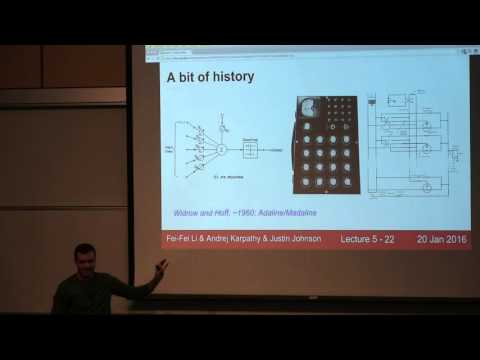

In [21]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-20):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  
</pre>

### <font color='blue'>2.1 Algorithm with Vanilla update of weights</font>

In [11]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
mu, sigma = 0, 0.01 # mean and standard deviation
w_vanilla = np.random.normal(mu, sigma,9)

learning_rate=0.001

In [12]:
epoch=100
mean_loss_vanilla=[]
for e in range(epoch):
  loss=0
  for i in range(len(X)):
    forward_dict=forward_propagation(X[i],y[i],w_vanilla)
    loss+= forward_dict['loss'] # loss of each datapoint
    gradients=backward_propagation(X[i],y[i],w_vanilla,forward_dict)
    dw=np.array(list(gradients.values()))

    # updating weights using vanilla update
    w_vanilla=w_vanilla-learning_rate * dw

  mean_loss_vanilla.append(loss/len(X)) # mean loss of all data points

### <font color='blue'>2.2 Algorithm with Momentum update of weights</font>

<img src='https://i.imgur.com/gyPSXhS.png'>

Here Gamma referes to the momentum coefficient, eta is leaning rate and v_t is moving average of our gradients at timestep t

In [13]:
mu, sigma = 0, 0.01 # mean and standard deviation
w_momentum = np.random.normal(mu, sigma,9)

gamma=0.9
learning_rate=0.001

In [14]:
v=[0.0]*len(X)
epoch=100
mean_loss_momentum=[]
for e in range(epoch):
  loss=0
  for i in range(len(X)):
    forward_dict=forward_propagation(X[i],y[i],w_momentum)
    loss+= forward_dict['loss'] # loss of each datapoint
    gradients=backward_propagation(X[i],y[i],w_momentum,forward_dict)
    dw=np.array(list(gradients.values()))

    v[i]= gamma * v[i] + learning_rate * dw

    # updating weights using momentum update
    w_momentum=w_momentum - v[i]

  mean_loss_momentum.append(loss/len(X))

### <font color='blue'>2.3 Algorithm with Adam update of weights</font>

<img src='https://i.imgur.com/GDR8UFP.jpg'>

In [16]:
mu, sigma = 0, 0.01 # mean and standard deviation
w_adam = np.random.normal(mu, sigma,9)

beta1=0.9
beta2=0.99
learning_rate=0.001
epsilon=1e-8

In [17]:
# function to calculate m at time t
def m_t(t):
    if t==1:
        return (1-beta1)*gt_list[0]
    else:
        return (beta1*(m_t(t-1)))+((1-beta1)*gt_list[t-1])

# function to calculate v at time t
def v_t(t):
    if t==1:
        return (1-beta2)*gt_list[0]**2
    else:
        return (beta2*(v_t(t-1)))+((1-beta2)*gt_list[t-1]**2)

In [18]:
epoch=50
mean_loss_adam=[]
for e in range(1,epoch+1):
  loss=0
  gt_list=[]
  for i in range(len(X)):
    t=i+1
    forward_dict=forward_propagation(X[i],y[i],w_adam)
    loss+= forward_dict['loss'] # loss of each datapoint
    gradients=backward_propagation(X[i],y[i],w_adam,forward_dict)
    gt_list.append(np.array(list(gradients.values())))  # gradient list - appending gradients at each t
    m_t_hat = m_t(t)/(1-beta1**t) # calculating m_t_hat using m_t function
    v_t_hat = v_t(t)/(1-beta2**t) # calculating v_t_hat using v_t function
    w_adam-=learning_rate*(m_t_hat/((v_t_hat+epsilon)**0.5))
  mean_loss_adam.append(loss/len(X))

<font color='blue'>Comparision plot between epochs and loss with different optimizers. Make sure that loss is conerging with increaing epochs</font>

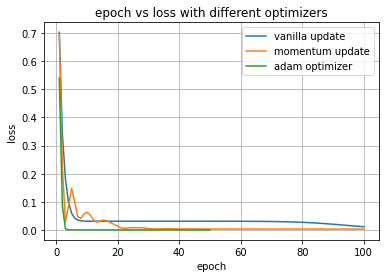

In [20]:
#plot the graph between loss vs epochs for all 3 optimizers.
plt.plot(range(1,101),mean_loss_vanilla,label='vanilla update')
plt.plot(range(1,101),mean_loss_momentum,label='momentum update')
plt.plot(range(1,51),mean_loss_adam,label='adam optimizer')
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("epoch vs loss with different optimizers")
plt.grid()
plt.show()

From the above plot we can conclude that adam optimzer is converging faster.